<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Case-X.-Template" data-toc-modified-id="Case-X.-Template-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Case X. Template</a></span></li><li><span><a href="#Background" data-toc-modified-id="Background-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Background</a></span></li><li><span><a href="#Data" data-toc-modified-id="Data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data</a></span></li><li><span><a href="#Modes-and-training" data-toc-modified-id="Modes-and-training-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Modes and training</a></span></li><li><span><a href="#Results-and-Discussion" data-toc-modified-id="Results-and-Discussion-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Results and Discussion</a></span></li><li><span><a href="#Conclusions" data-toc-modified-id="Conclusions-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Conclusions</a></span></li></ul></div>

# Case 1. Template
Tuomas Tilli<br>
Last edited: 02.02.2020<br>
Neural Networks for Health Technology Applications<br>
[Helsinki Metropolia University of Applied Sciences](http://www.metropolia.fi/en/)<br>

# Background

The aim of this Notebook is to train a neural network based on known data to predict heart disease incidence. The dataset used here was collected from Cleveland Clinic Foundation and is called processed.cleveland.data.

# Data

In [4]:
%pylab inline
import pandas as pd

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
df = pd.read_csv(url,
                index_col = None,
                header = None,
                na_values = '?')
df.describe()

Populating the interactive namespace from numpy and matplotlib


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


The data contained 14 raw attributes and the amount of instances was 303. 6 values are missing and they are distinguished with value "?". The last attribute is the predicted attribute and represents the diagnosis of disease. This class variable had values of 0, 1, 2, 3 or 4. Value 0 represents a healthy sample and a value of 1 or higher represents >50% narrowing of arterial diameter.

Attribute Information:
    1.    (age)       
    2.    (sex)       
    3.    (cp)        
    4.    (trestbps)  
    5.    (chol)      
    6.    (fbs)       
    7.    (restecg)   
    8.    (thalach)   
    9.    (exang)     
    10.   (oldpeak)   
    11.   (slope)     
    12.   (ca)        
    13.   (thal)      
    14.   (num)       (the predicted attribute)

The missing values were filled with values of 0. Data was split into input variables (first 12 columns) and predicted output variables (column 13). All output values of 1 or higher were edited into value 1 to represent class "not healthy" while 0 represented class "healthy".

The data was normalized and split for training (60%), validation (20%) and testing (20%). 

In [232]:
df = df.fillna(0)

data = df.loc[:, 0:12]
targets = 1.0*(df.loc[:, 13] > 0)

data = np.asarray(data)
targets = np.asarray(targets)

from tensorflow.keras.utils import to_categorical
targets = to_categorical(targets)

# Split data into training data and test data
train_data = data[:241]
train_targets = targets[:241]
test_data = data[241:]
test_targets = targets[241:]

# Normalize training data
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

# Normalize test data
test_data -= mean
test_data /= std

# Split training data into training data and validation data
partial_train_data = train_data[:181]
partial_train_targets = train_targets[:181]
val_data = train_data[181:]
val_targets = train_targets[181:]

# Models and training

ReLU activation function was used for the hidden layers of every model tested. The chosen activation function
for the final output layer was sigmoid. The chosen loss function was binary_crossentropy and rmsprop was used as the optimizer. Plotting was used to evaluate model performance regarding loss and accuracy.<br>

The following models were tried out:<br><br>
Model 1: 100 epochs, 1 hidden layer (64 neurons), batch_size 16<br>
Model 2: 40 epochs, 1 hidden layer (64 neurons), batch_size 8<br>
Model 3: 40 epochs, 1 hidden layer (64 neurons), batch_size 16<br>
Model 4: 40 epochs, 1 hidden layer (64 neurons), batch_size 32<br>
<br>
Model 5: 40 epochs, 1 hidden layer (32 neurons), batch_size 32<br>
Model 6: 40 epochs, 1 hidden layer (64 neurons), batch_size 48<br>
<br>
Model 7: 40 epochs, 2 hidden layers (64+64 neurons), batch_size 8<br>
Model 8: 40 epochs, 2 hidden layers (64+64 neurons), batch_size 16<br>
Model 9: 40 epochs, 2 hidden layers (64+64 neurons), batch_size 32<br>
Model 10: 40 epochs, 3 hidden layers (64+64+32 neurons), batch_size 16<br>
<br>
Model 11: 40 epochs, 1 hidden layer (64 neurons), batch_size 32 [with regularizer l2 (0.05)]<br>
Model 12: 40 epochs, 1 hidden layer (64 neurons), batch_size 32 [with dropout of 20%]<br>

In [233]:
# Model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(train_data[0].shape)))

# Regularization

#model.add(Dense(64, kernel_regularizer=regularizers.l2(0.05), activation='relu', input_shape=(train_data[0].shape)))

# Dropout

#model.add(Dense(64, activation='relu', input_shape=(train_data[0].shape)))
#model.add(Dropout(0.2))


model.add(Dense(2, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(partial_train_data, partial_train_targets,
                    epochs=40, batch_size=32, verbose=0,
                    validation_data = (val_data, val_targets))

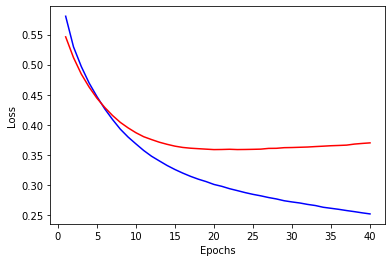

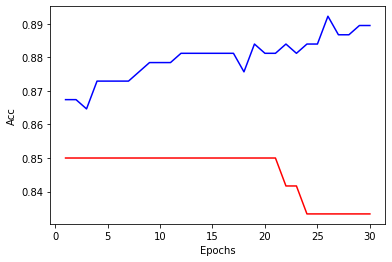

In [231]:
# Plot the loss score and accuracy for both training and validation sets

loss = history.history['loss']
val_loss = history.history['val_loss']
mae = history.history['accuracy']
val_mae = history.history['val_accuracy']

time = range(1,len(loss)+1)

plt.plot(time, loss, 'b-')
plt.plot(time, val_loss, 'r-')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# Take out first 10 to get a nicer graph
short_acc = mae[10:]
short_val_acc = val_mae[10:]

plt.plot(range(1,len(short_acc)+1), short_acc, 'b-')
plt.plot(range(1,len(short_val_acc)+1), short_val_acc, 'r-')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.show()

# LOSS/ACC = BLUE GRAPH
# VALIDATION LOSS/ACC = RED GRAPH

In [227]:
# Final evaluation with test data.

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(train_data[0].shape)))

model.add(Dense(2, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(train_data, train_targets, epochs=20, batch_size=32, verbose=0)

test_acc_score, test_acc_score = model.evaluate(test_data, test_targets)

62/1 [==================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

# Results and Discussion

The final model consisted of only one layer with 64 neurons, a batch size of 32 and an epoch number of 20. This model was sufficient with more complex models providing no further increases in performance.

After 20 epochs the overfitting of the model became apparent. While training accuracy kept increasing the validation accuracy started to go down. Regularization and dropout were briefly tested and were found to reduce overfitting but in the end had no meaningful impact on accuracy.

Results from evaluation with test data:
loss: 0.4971 - accuracy: 0.7581

# Conclusions

It was possible to build a neural network to predict the presence of heart disease using a series of patient data. The accuracy of the model was 75 % when evaluated with test data. The model used was relatively simple with complex setups proving no more accurate. To achieve higher prediction accuracy and to gain performance boosts from a more sophisticated model a much larger dataset would be needed. 